In [19]:
#usual imports
import tensorflow as tf
import pandas as pd 
import numpy as np

**Overfit vs Underfit**

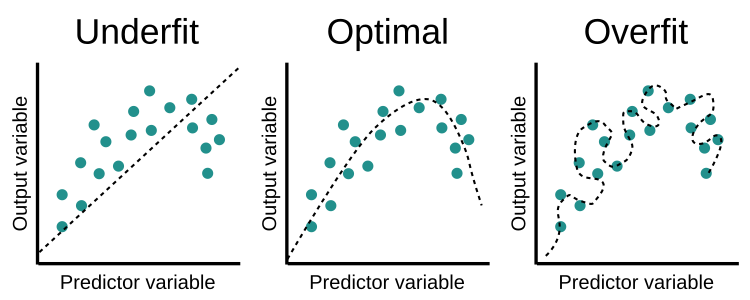

overfitting more likely to occur on smaller datasets Because there's less likelihood of all possible features being encountered in the training process.

**Split the Dataset**

1)train-test split

In [20]:
from sklearn.model_selection import train_test_split
X = np.array(range(10))
y = np.array(range(10,20))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train)
print(y_train)

[6 7 9 1 4 5 0]
[16 17 19 11 14 15 10]


2)train-validation-test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
print(X_val)
print(y_val)

[9 2]
[19 12]


3)cross validation

In [21]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

**Missing Values**


In [ ]:
#how to check for missing values 
df=pd.DataFrame({"col1":["A","B","C"],"col2":[1,2,3],"col3":[None,np.nan,""]})
df.isnull().sum()

col1    0
col2    0
col3    2
dtype: int64

1) Drop Missing Values

we will simply remove all the columns that contain missing values, the problem is that we might loos a lot of data just for the sake of removing some missing values

In [ ]:
df=pd.DataFrame({"col1":["A",None,"C"],"col2":[1,np.nan,3],"col3":["H","i","!"]})
df =df.drop(['col1','col2'],axis=1)
print(df)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

  col3
0    H
1    i
2    !


2) Imputation 

the missing values with some number e.g. the mean value of the column or using other various satistics algorithms like e.g. regression imputation

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


**Categorical Variables**

a variable that can take a limited number of possible values

1)Ordinal Encoding

an ordinal value is just like the categorical variable but with a clear ordering of the categories

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['A', 1], ['B', 3], ['C', 2]]
enc.fit(X)
enc.transform([['A', 3], ['B', 1],['C',2]])
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

array([[0., 2.],
       [1., 0.],
       [2., 1.]])

In [ ]:
df=pd.DataFrame({"col1":["A","B","C"],"col2":[1,2,3],"col3":[None,np.nan,""],"col4":["H","i","!"]})
enc=OrdinalEncoder()
df_encoded=df.copy()
df_encoded[["col1","col2"]]=enc.fit_transform(df[["col1","col2"]])
print(df_encoded)

   col1  col2  col3 col4
0   0.0   0.0  None    H
1   1.0   1.0   NaN    i
2   2.0   2.0          !


2)One-Hot Encoding

representation of categorical variables as binary vectors.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['A', 1], ['B', 3], ['A', 2]]
enc.fit(X)
enc.categories_
enc.transform([['Female', 1], ['Male', 4]]).toarray()
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html                       
#https://www.tensorflow.org/api_docs/python/tf/one_hot                                            

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
df=pd.DataFrame({"col1":["A","B","C"],"col2":[1,2,3],"col3":[None,np.nan,""],"col4":["H","i","!"]})
print(OH_encoder.fit_transform(df[["col1"]]))
print(OH_encoder.fit_transform(df[["col2"]]))
print(OH_encoder.fit_transform(df[["col2","col1"]]))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


**Images**

1.   Image standardization
2.   Normalization
2.   Data Augmentation



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
########################################################################
import os
import zipfile
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
dir = os.path.join('/tmp/cats_and_dogs_filtered', 'train')
train_cats_dir = os.path.join(dir, 'cats')
train_dogs_dir = os.path.join(dir, 'dogs')
#######################################################################

datagen = ImageDataGenerator( rescale = 1.0/255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

train="path/to/image" #usually we use the os lib 
generator = datagen.flow_from_directory(dir,
                                        batch_size=20,
                                        class_mode='binary',
                                        target_size=(150, 150))
#https://www.section.io/engineering-education/image-preprocessing-in-python/
#https://www.youtube.com/watch?v=QWdYWwW6OAE&t=463s

--2021-11-16 20:10:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.251.45.112, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   157MB/s    in 0.4s    

2021-11-16 20:10:04 (157 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.


**Text**

1.   Segmentaion/tokenization 
2.   Normalization 
3.   segemntating sentences 





In [ ]:
##1)Segmentaion/tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
data="Hello ml-dep"
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data)
list(tokenizer.word_index.keys())[:10]
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
#type |V| : an element of the vocabulary 
#tokens N, token : an instance of that type in run    ning text
#|V|>sqrt(N)
#max-matching 



['l', 'e', 'h', 'o', 'm', 'd', 'p']

In [ ]:
##2)Normalization
import string
txt="Hello ml-dep"
def text_Normalization(txt):
    txt="".join(c for c in txt if c not in string.punctuation).lower().strip()
    txt.encode('utf8','ignore')
    return txt
#data=data.apply(lambda x:text_preprocessing(x))
#https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing
text_Normalization(txt)

'hello mldep'

In [ ]:
#regurlar expressions
#formal language for specifying text strings
#http://regexpal.com.s3-website-us-east-1.amazonaws.com/ (a tool to demonstrate regexp)
#disjunction [^aA^] [A-Z1-9] [ !] [a|b]
#? : optional previous char 
#* : 0 or more prev char 
#+ : 1 or more prev chat 
#. : any char (\. to escape it)
#^ : the begining of a line 
#$ : the end of the line 
import re
txt = "hello gdsc send me your taks via myemail@gmail.com "
pattern=re.compile(r'[a-zA-Z0-9]+@+[a-zA-Z0-9]+\.+[a-zA-Z]{3}')
print(pattern.search(txt).group())

myemail@gmail.com


In [ ]:
##3)segmentating sentences 
#build a binary classifier that looks at the 
#punctuation and decides wether it's the end of the setance or not 
#e.g.: decision tree